In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Importing MinMaxScaler

from sklearn.preprocessing  import MinMaxScaler

In [2]:
wine=pd.read_csv("https://raw.githubusercontent.com/Prayagv15/Principal-Component-Analysis/main/wine.csv")

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.sample()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


In [78]:
# Knowing how many different types of wines are there from using Counter Class from the collections module.

from collections import Counter 
print(Counter(wine['Type']))

Counter({2: 71, 1: 59, 3: 48})


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
# Shape of the DataFrame

wine.shape

(178, 14)

In [8]:
# Choosing Numerical and Label Columns

y=wine.iloc[:,0]
x=wine.iloc[:,1:]

In [9]:
x.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
# Scaling Numerical values using MinMaxScaler

scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(x)

In [11]:
X=scaled_df

In [12]:
# Covariance Matrix

square_matrix=np.matmul(X.T,X)
square_matrix

array([[55.94790166, 29.9097306 , 50.85776808, 40.3039338 , 31.43080664,
        44.21969147, 34.78431046, 38.99647468, 35.32014777, 33.8433312 ,
        35.32701326, 46.07706767, 36.33945491],
       [29.9097306 , 26.34399459, 31.16619814, 27.68844994, 17.82295068,
        22.63945754, 16.62865863, 27.25449325, 19.36194062, 20.02725988,
        17.72207012, 23.85127192, 17.09583007],
       [50.85776808, 31.16619814, 55.3774486 , 45.90983516, 32.12776099,
        44.17025632, 34.77416007, 43.04752295, 35.73577489, 32.21452424,
        36.82931177, 47.11194688, 33.34675063],
       [40.3039338 , 27.68844994, 45.90983516, 42.66497502, 25.98963469,
        34.89911127, 26.82980991, 38.2920638 , 29.31732739, 26.42200746,
        30.12873187, 37.91656282, 24.27992411],
       [31.43080664, 17.82295068, 32.12776099, 25.98963469, 22.86838374,
        27.36664168, 21.64137314, 23.5192781 , 22.60934714, 19.63666715,
        22.61954754, 28.75199076, 21.67293618],
       [44.21969147, 22.639457

In [13]:
# Eigenvalues of the covariance matrix in decreasing oreder.

np.linalg.eigh(square_matrix)[0][::-1]

array([414.14031684,  33.98475835,  15.58201667,   7.3385978 ,
         5.32048043,   4.53532115,   3.52460626,   2.70663782,
         2.18932587,   2.15358959,   1.47101377,   1.24972187,
         0.77930495])

In [14]:
# Eigenvectors corresponding to the Eigenvalues above.

np.linalg.eigh(square_matrix)[1][:,::-1]

array([[ 3.49331221e-01,  5.93471128e-02, -4.70938085e-01,
        -7.42911510e-02,  2.78723498e-01, -1.52380991e-01,
         2.44007955e-01, -5.20759147e-01, -1.26135175e-01,
         6.63264100e-02,  4.39219767e-01, -4.63268852e-02,
         1.17293632e-02],
       [ 2.01022373e-01,  3.79436647e-01, -2.49845569e-02,
         6.52666403e-01,  4.13245420e-01, -2.03149100e-01,
        -2.86914593e-01,  1.10157761e-01, -4.60936782e-02,
        -2.39623133e-01, -1.44681204e-01,  3.28482651e-02,
         3.11222296e-02],
       [ 3.56012914e-01,  1.74857096e-01,  7.61651902e-02,
        -1.81519904e-02, -2.89030725e-01, -1.90710900e-01,
         2.45457172e-01,  3.26494712e-01,  1.72606510e-02,
        -6.56655460e-02,  2.28218968e-01,  6.08411255e-01,
        -3.50619018e-01],
       [ 2.93223505e-01,  3.04819202e-01,  3.44672031e-01,
         1.39242860e-01, -4.20076743e-01, -7.81159426e-02,
         3.12696680e-01, -1.41484570e-01,  2.60293767e-01,
        -1.49291485e-01,  5.62785041e

In [15]:
# Principal Components

new_data=np.matmul(X,np.linalg.eigh(square_matrix)[1][:,::-1])

In [16]:
new_data=pd.DataFrame(new_data)

In [17]:
new_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.965754,-0.497453,-0.233561,0.026089,0.026691,-0.074433,-0.065640,-0.091287,-0.020998,0.304062,0.014195,0.051533,-0.007920
1,1.478743,-0.488921,-0.184450,-0.060043,0.240098,-0.100510,-0.003670,0.101123,-0.071526,0.104071,-0.112486,0.063780,-0.006156
2,1.911227,-0.322592,-0.105952,0.087453,-0.046445,0.119833,-0.106892,0.108599,0.219374,-0.055301,0.042628,0.100354,-0.023345
3,2.106077,-0.520098,-0.532945,0.072911,0.003523,0.120107,0.090347,0.181345,-0.025221,0.049909,0.013816,-0.135976,-0.052826
4,1.853606,-0.019308,0.115458,0.047741,-0.107207,-0.068469,-0.027883,0.080802,-0.132525,0.027625,0.106789,0.077772,-0.033823


In [18]:
new_data.columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13"]

In [19]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.965754,-0.497453,-0.233561,0.026089,0.026691,-0.074433,-0.065640,-0.091287,-0.020998,0.304062,0.014195,0.051533,-0.007920
1,1.478743,-0.488921,-0.184450,-0.060043,0.240098,-0.100510,-0.003670,0.101123,-0.071526,0.104071,-0.112486,0.063780,-0.006156
2,1.911227,-0.322592,-0.105952,0.087453,-0.046445,0.119833,-0.106892,0.108599,0.219374,-0.055301,0.042628,0.100354,-0.023345
3,2.106077,-0.520098,-0.532945,0.072911,0.003523,0.120107,0.090347,0.181345,-0.025221,0.049909,0.013816,-0.135976,-0.052826
4,1.853606,-0.019308,0.115458,0.047741,-0.107207,-0.068469,-0.027883,0.080802,-0.132525,0.027625,0.106789,0.077772,-0.033823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.486692,0.888320,-0.243248,0.229273,0.291643,-0.072341,-0.078999,0.037199,-0.006420,-0.050568,-0.035202,-0.005211,-0.019119
174,1.435216,0.682077,-0.198380,0.105112,-0.050274,-0.025590,-0.047392,-0.022644,0.047643,-0.085188,0.034348,-0.066004,-0.032070
175,1.406310,0.738718,-0.431830,0.139468,-0.072974,0.004863,-0.196149,-0.002869,-0.005707,0.067285,-0.179248,-0.040775,0.039866
176,1.411621,0.670539,-0.309485,-0.160215,-0.150953,0.108994,-0.151333,0.031821,0.010727,0.192551,-0.065107,-0.039180,0.011309


In [20]:
wine_type=wine["Type"]
wine_type=pd.DataFrame(wine_type)

In [21]:
# Concatinating Principal Components to Winw Types.

new_data=pd.concat([new_data,wine_type],axis=1)

In [22]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Type
0,1.965754,-0.497453,-0.233561,0.026089,0.026691,-0.074433,-0.065640,-0.091287,-0.020998,0.304062,0.014195,0.051533,-0.007920,1
1,1.478743,-0.488921,-0.184450,-0.060043,0.240098,-0.100510,-0.003670,0.101123,-0.071526,0.104071,-0.112486,0.063780,-0.006156,1
2,1.911227,-0.322592,-0.105952,0.087453,-0.046445,0.119833,-0.106892,0.108599,0.219374,-0.055301,0.042628,0.100354,-0.023345,1
3,2.106077,-0.520098,-0.532945,0.072911,0.003523,0.120107,0.090347,0.181345,-0.025221,0.049909,0.013816,-0.135976,-0.052826,1
4,1.853606,-0.019308,0.115458,0.047741,-0.107207,-0.068469,-0.027883,0.080802,-0.132525,0.027625,0.106789,0.077772,-0.033823,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.486692,0.888320,-0.243248,0.229273,0.291643,-0.072341,-0.078999,0.037199,-0.006420,-0.050568,-0.035202,-0.005211,-0.019119,3
174,1.435216,0.682077,-0.198380,0.105112,-0.050274,-0.025590,-0.047392,-0.022644,0.047643,-0.085188,0.034348,-0.066004,-0.032070,3
175,1.406310,0.738718,-0.431830,0.139468,-0.072974,0.004863,-0.196149,-0.002869,-0.005707,0.067285,-0.179248,-0.040775,0.039866,3
176,1.411621,0.670539,-0.309485,-0.160215,-0.150953,0.108994,-0.151333,0.031821,0.010727,0.192551,-0.065107,-0.039180,0.011309,3


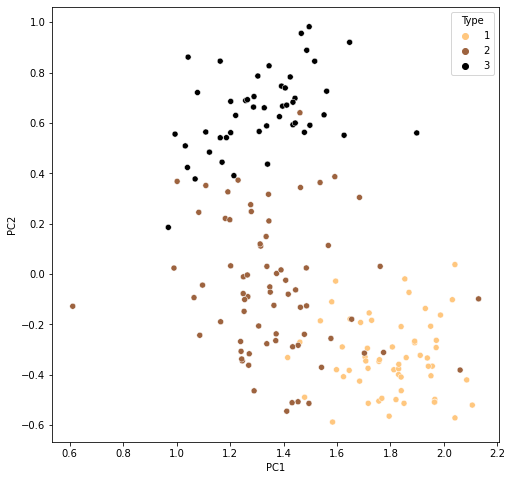

In [23]:
# Scatter plots for Principal Components 1 and 2.

plt.figure(figsize=(8,8))
sns.scatterplot(x=new_data.PC1,y=new_data.PC2,data=new_data,hue="Type",palette='copper_r');

# ***Scree Plot***

In [24]:
data=pd.read_csv("https://raw.githubusercontent.com/Prayagv15/Principal-Component-Analysis/main/wine.csv")

In [25]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
df=data.iloc[:,1:]
scaled_df=df.copy()

In [27]:
scaler=MinMaxScaler()
a=scaler.fit_transform(scaled_df)

In [28]:
scaled_df=pd.DataFrame(a,columns=scaled_df.columns)

In [29]:
scaled_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [30]:
# Importing PCA from sklearn

from sklearn.decomposition import PCA

In [31]:
pca=PCA(n_components=13) # Since there are 13 features

In [32]:
pca_fit=pca.fit(scaled_df)

In [33]:
pca_fit

PCA(n_components=13)

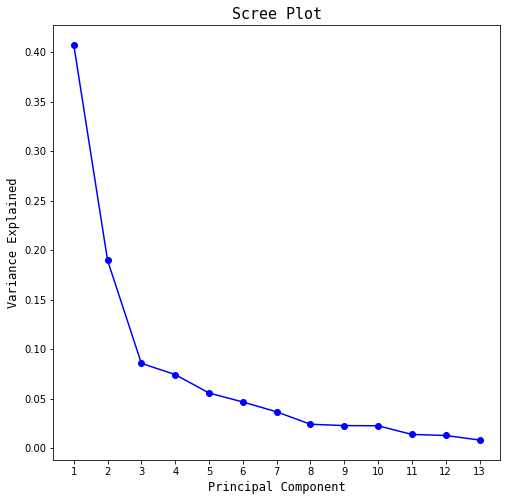

In [34]:
# Scree Plot

PC_values=np.arange(pca.n_components_)+1

plt.figure(figsize=(8,8))
plt.plot(PC_values,pca.explained_variance_ratio_,'o-',color='b')
plt.xticks(PC_values)
plt.title('Scree Plot',family='monospace',fontsize=15)
plt.xlabel('Principal Component',family='monospace',fontsize=12)
plt.ylabel('Variance Explained',family='monospace',fontsize=12)
plt.show()

In [35]:
print(pca.explained_variance_ratio_)

[0.40749485 0.18970352 0.08561671 0.07426678 0.05565301 0.04658837
 0.03663929 0.02408789 0.02274371 0.02250965 0.01381292 0.01273236
 0.00815095]


In [36]:
for x in list(pca.explained_variance_ratio_):
  print(np.round(x,4))

0.4075
0.1897
0.0856
0.0743
0.0557
0.0466
0.0366
0.0241
0.0227
0.0225
0.0138
0.0127
0.0082


The first Principal Component explains **40.75%** of the total variation in the dataset.

In [37]:
# The amount of variance that each PC explains

var=pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [38]:
# Cumulative Variance

var1=np.cumsum(np.round(var,4)*100) # Perfom partial sum with the cumsum() function.

In [39]:
pca.components_

array([[-1.33367664e-01,  2.48515807e-01, -7.39167565e-04,
         1.77838621e-01, -8.86572802e-02, -3.95070868e-01,
        -4.14589792e-01,  3.33108614e-01, -2.52902105e-01,
         9.23290406e-02, -2.51137258e-01, -4.73492101e-01,
        -2.86862112e-01],
       [-5.50883679e-01, -2.27390577e-01, -1.63091200e-01,
         7.97763293e-02, -1.88165658e-01, -7.41447292e-02,
        -1.00692215e-03, -9.96036899e-03, -3.14178847e-02,
        -5.19707496e-01,  2.37206223e-01,  2.15562246e-01,
        -4.43888361e-01],
       [-8.38483848e-02,  4.92039271e-01,  4.03009367e-01,
         4.77242411e-01,  6.55069647e-03,  2.53065140e-01,
         1.96105456e-01,  2.85981862e-01,  2.28342345e-01,
        -3.30999741e-02, -1.06588781e-01,  2.97776289e-01,
        -1.51968292e-01],
       [-4.03281504e-02,  4.86032016e-01, -2.41975652e-01,
        -8.16939916e-02,  1.58801742e-02, -5.26432313e-02,
        -2.70332340e-02, -7.09095281e-01,  7.65736687e-02,
        -2.63220354e-02, -3.52498013e

# *Cumulative Variance Plot*
**Cumulative variance plot showing the total percentage of variance explained vs. the number of principal components.**

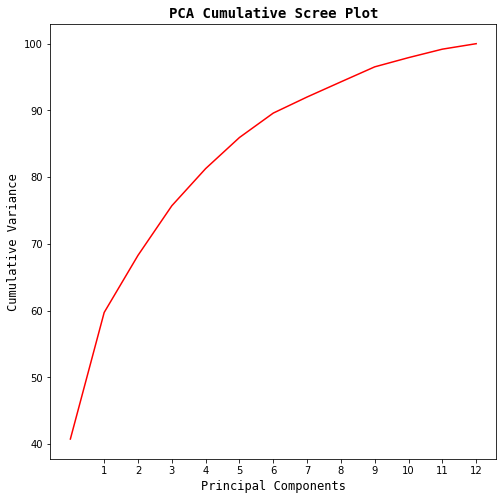

In [40]:
# Commulative Variance Plot

PC_values=np.arange(pca.n_components_)+1
plt.figure(figsize=(8,8))
plt.xticks(PC_values)
plt.title('PCA Cumulative Scree Plot',family='monospace',fontsize=14,weight='bold')
plt.xlabel('Principal Components',family='monospace',fontsize=12)
plt.ylabel('Cumulative Variance',family='monospace',fontsize=12)
plt.plot(var1,color='r')
plt.show()

# **Now we perform Heirarchical and K-Means clustering using first three columns of Principal Component Scores.**

## ***Heirarchical Clustering***

In [41]:
# Importing Libraries for Heirarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [42]:
data=new_data.iloc[:,:3]

In [43]:
data=pd.concat([data,new_data['Type']],axis=1)

In [44]:
data.head()

,PC1,PC2,PC3,Type
0,1.965754,-0.497453,-0.233561,1
1,1.478743,-0.488921,-0.184450,1
2,1.911227,-0.322592,-0.105952,1
3,2.106077,-0.520098,-0.532945,1
4,1.853606,-0.019308,0.115458,1


In [45]:
data.iloc[:,:3].describe()

,PC1,PC2,PC3
count,178.000000,178.000000,178.000000
mean,1.497184,0.041043,0.019166
std,0.292490,0.436246,0.296082
min,0.611403,-0.587410,-0.547573
25%,1.272980,-0.327424,-0.233238
50%,1.454452,-0.091603,-0.021251
75%,1.719321,0.432951,0.271512
max,2.129440,0.981858,0.836439


In [46]:
data.sample(5)

,PC1,PC2,PC3,Type
144,1.170034,0.443958,-0.274556,3
150,1.308805,0.566009,-0.346609,3
121,2.129440,-0.098523,0.609395,2
114,1.408047,-0.024552,0.499172,2
4,1.853606,-0.019308,0.115458,1


In [47]:
data1=data.iloc[:,:3]
scaled_df=data1.copy()

In [48]:
scaler=MinMaxScaler()
scaled_df=data1.copy()
a=scaler.fit_transform(scaled_df)

In [49]:
scaled_df

,PC1,PC2,PC3
0,1.965754,-0.497453,-0.233561
1,1.478743,-0.488921,-0.184450
2,1.911227,-0.322592,-0.105952
3,2.106077,-0.520098,-0.532945
4,1.853606,-0.019308,0.115458
...,...,...,...
173,1.486692,0.888320,-0.243248
174,1.435216,0.682077,-0.198380
175,1.406310,0.738718,-0.431830
176,1.411621,0.670539,-0.309485


In [50]:
scaled_df=pd.DataFrame(a,columns=scaled_df.columns)

In [51]:
scaled_df

,PC1,PC2,PC3
0,0.892173,0.057324,0.226885
1,0.571356,0.062761,0.262370
2,0.856253,0.168753,0.319087
3,0.984609,0.042894,0.010569
4,0.818296,0.362017,0.479065
...,...,...,...
173,0.576592,0.940394,0.219886
174,0.542683,0.808967,0.252304
175,0.523641,0.845061,0.083629
176,0.527140,0.801615,0.172027


In [52]:
scaled_df.sample()

,PC1,PC2,PC3
80,0.417941,0.154711,0.760051


In [53]:
scaled_df=pd.concat([scaled_df,new_data['Type']],axis=1)

In [54]:
scaled_df

,PC1,PC2,PC3,Type
0,0.892173,0.057324,0.226885,1
1,0.571356,0.062761,0.262370,1
2,0.856253,0.168753,0.319087,1
3,0.984609,0.042894,0.010569,1
4,0.818296,0.362017,0.479065,1
...,...,...,...,...
173,0.576592,0.940394,0.219886,3
174,0.542683,0.808967,0.252304,3
175,0.523641,0.845061,0.083629,3
176,0.527140,0.801615,0.172027,3


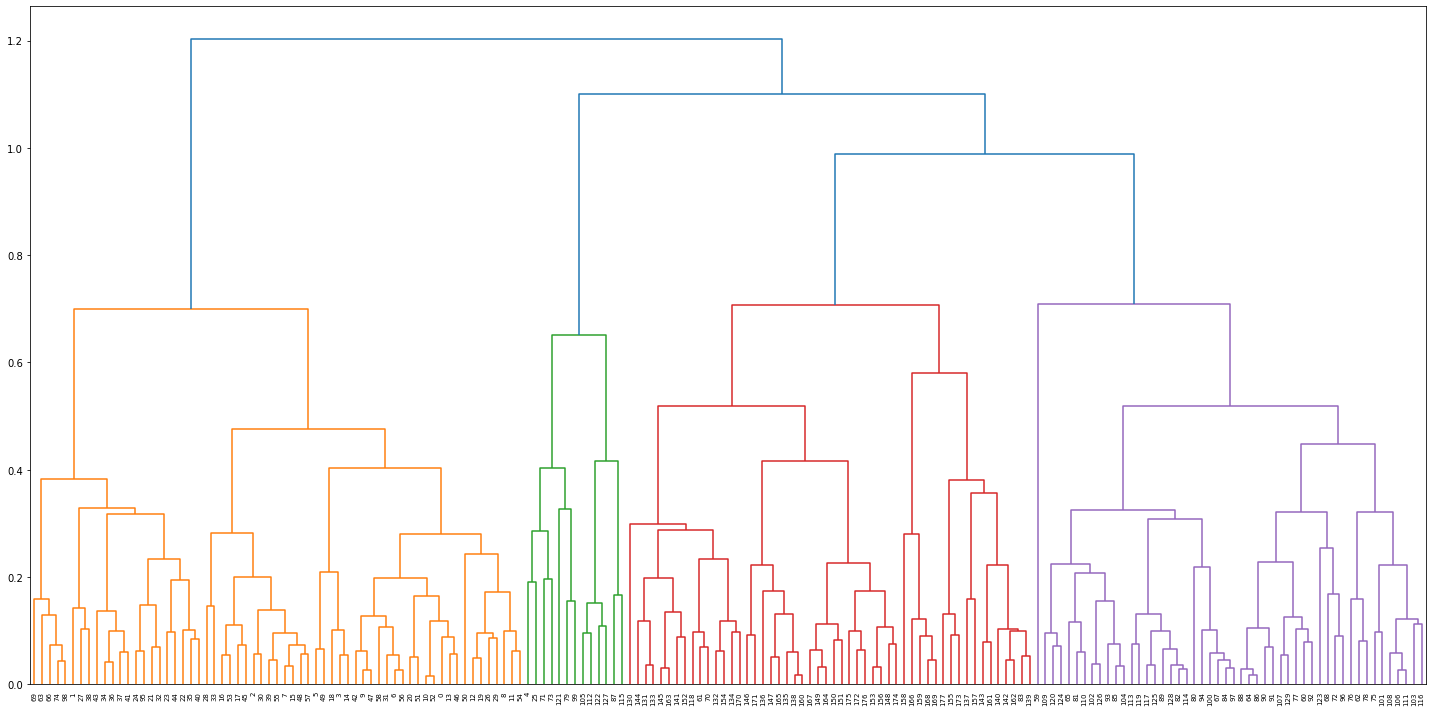

In [55]:
# Dendrogram

plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(scaled_df.iloc[:,:3],method='complete'),leaf_font_size=7,orientation='top')
plt.tight_layout()

In [56]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [57]:
hc.fit(scaled_df.iloc[:,:3])

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [58]:
y_hc=hc.fit_predict(scaled_df.iloc[:,:3])

In [59]:
y_hc

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [60]:
scaled_df['H_Cluster_ID']=y_hc

In [61]:
scaled_df

,PC1,PC2,PC3,Type,H_Cluster_ID
0,0.892173,0.057324,0.226885,1,1
1,0.571356,0.062761,0.262370,1,1
2,0.856253,0.168753,0.319087,1,1
3,0.984609,0.042894,0.010569,1,1
4,0.818296,0.362017,0.479065,1,2
...,...,...,...,...,...
173,0.576592,0.940394,0.219886,3,0
174,0.542683,0.808967,0.252304,3,0
175,0.523641,0.845061,0.083629,3,0
176,0.527140,0.801615,0.172027,3,0


In [62]:
scaled_df1=scaled_df.sort_values('H_Cluster_ID')
scaled_df1.iloc[:,[-1]]

,H_Cluster_ID
88,0
113,0
114,0
116,0
117,0
...,...
121,2
79,2
87,2
115,2


In [63]:
scaled_df1

,PC1,PC2,PC3,Type,H_Cluster_ID
88,0.476524,0.469250,0.715087,2,0
113,0.420534,0.367329,0.740384,2,0
114,0.524786,0.358676,0.756312,2,0
116,0.364391,0.253625,0.703920,2,0
117,0.486702,0.328606,0.696753,2,0
...,...,...,...,...,...
121,1.000000,0.311538,0.835952,2,2
79,0.757558,0.393753,0.717518,2,2
87,0.575563,0.389769,0.867231,2,2
115,0.561019,0.290308,1.000000,2,2


In [64]:
scaled_df1=scaled_df1.set_index('Type')

In [65]:
scaled_df1

,PC1,PC2,PC3,H_Cluster_ID
Type,,,,
2,0.476524,0.469250,0.715087,0
2,0.420534,0.367329,0.740384,0
2,0.524786,0.358676,0.756312,0
2,0.364391,0.253625,0.703920,0
2,0.486702,0.328606,0.696753,0
...,...,...,...,...
2,1.000000,0.311538,0.835952,2
2,0.757558,0.393753,0.717518,2
2,0.575563,0.389769,0.867231,2


## ***K-Means Clustering***

In [66]:
# Importing libraries for K-Means Clustering

from sklearn.cluster import KMeans

In [67]:
data=scaled_df.drop(['H_Cluster_ID'],axis=1)

In [68]:
data

,PC1,PC2,PC3,Type
0,0.892173,0.057324,0.226885,1
1,0.571356,0.062761,0.262370,1
2,0.856253,0.168753,0.319087,1
3,0.984609,0.042894,0.010569,1
4,0.818296,0.362017,0.479065,1
...,...,...,...,...
173,0.576592,0.940394,0.219886,3
174,0.542683,0.808967,0.252304,3
175,0.523641,0.845061,0.083629,3
176,0.527140,0.801615,0.172027,3


In [69]:
data.describe()

,PC1,PC2,PC3,Type
count,178.000000,178.000000,178.000000,178.000000
mean,0.583504,0.400475,0.409490,1.938202
std,0.192676,0.277993,0.213930,0.775035
min,0.000000,0.000000,0.000000,1.000000
25%,0.435811,0.165674,0.227119,1.000000
50%,0.555355,0.315948,0.380287,2.000000
75%,0.729836,0.650215,0.591819,3.000000
max,1.000000,1.000000,1.000000,3.000000


In [70]:
X=data.iloc[:,:3]

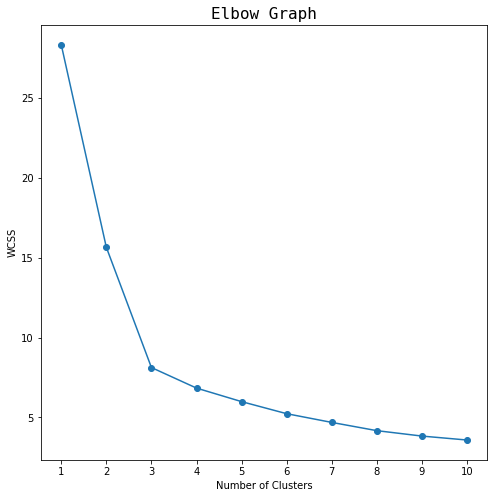

In [71]:
# Plotting Elbow Curve

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range(1,11),wcss,marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Graph',family='monospace',fontsize=16)
plt.show()

In [72]:
# Importing libraries for Silhouette Analysis to get optimum number of clusters.

from sklearn.metrics import silhouette_score,silhouette_samples

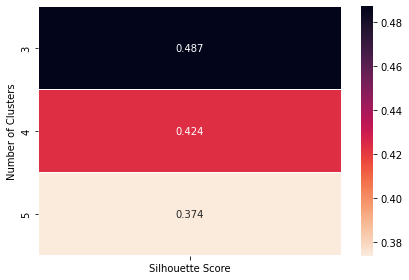

In [73]:
range_of_clusters=[3,4,5]
results=[]

for n_clusters in range_of_clusters:
  clustered=KMeans(n_clusters=n_clusters,init='k-means++',random_state=42)
  clustered_labels=clustered.fit_predict(X)
  silhouette_avg=silhouette_score(X,clustered_labels)
  results.append([n_clusters,silhouette_avg])

results=pd.DataFrame(results,columns=["Number of Clusters","Silhouette Score"])
pivot_km=pd.pivot_table(results,index="Number of Clusters",values="Silhouette Score")

plt.figure()
sns.heatmap(pivot_km,annot=True,linewidth=0.5,fmt='0.3f',cmap=sns.cm.rocket_r)
plt.tight_layout()

## **Conclusions**
**From Silhouette Analysis we can see that the number of optimum clusters are three which is same number of clusters with Principal Component Analysis.**
